
## 📘 M2.4 Pandas 缺失值處理基礎

本教學將介紹 Pandas 中處理缺失值的基本方法。在實際數據分析中，處理缺失值是數據清洗過程中的重要步驟，掌握這些技巧可以幫助您更有效地準備數據。


### 🎯 教學目標

- 🔍 了解 Pandas 中缺失值的表示方式
- 📊 學習檢測和計算缺失值的方法
- 🧹 掌握處理缺失值的基本策略（刪除與填充）
- 💻 練習缺失值處理的基本技巧

### 🧰 環境設置

In [3]:
import numpy as np
import pandas as pd

# 設置顯示選項
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 10)
pd.set_option('display.width', 80)
pd.set_option('display.precision', 3)

 
### 📊 1. 缺失值的表示與創建

Pandas 使用 `NaN` (Not a Number) 來表示數值型數據的缺失值，使用 `None` 表示其他類型的缺失值。

In [4]:
# 1.1 創建帶有缺失值的 DataFrame
df = pd.DataFrame({
    'A': [1, 2, np.nan, 4, 5],
    'B': [np.nan, 2, 3, 4, 5],
    'C': [1, 2, 3, np.nan, 5],
    'D': ['a', 'b', 'c', None, 'e']
})

print("帶有缺失值的 DataFrame:")
print(df)

帶有缺失值的 DataFrame:
     A    B    C     D
0  1.0  NaN  1.0     a
1  2.0  2.0  2.0     b
2  NaN  3.0  3.0     c
3  4.0  4.0  NaN  None
4  5.0  5.0  5.0     e


In [ ]:
# 1.2 了解 NaN 和 None 的區別
print("NaN 是浮點型嗎?", np.issubdtype(type(np.nan), np.floating))
print("None 的類型:", type(None))
print("\n使用 np.nan 建立的列的數據類型:", df['A'].dtype)
print("使用 None 建立的列的數據類型:", df['D'].dtype)

In [ ]:
# 解說:
# - Pandas 使用浮點型的 NaN 表示數值型缺失值
# - None 表示非數值型數據的缺失
# - 當列中含有 NaN 時，數值列會被轉換為浮點型
# - 當列中含有 None 時，字符串列會保持原數據類型
# - 在大多數情況下，Pandas 會將 None 在內部轉換為 NaN 進行處理

 
### 📊 2. 檢測缺失值

In [ ]:
# 2.1 檢測缺失值
is_na = df.isna()  # 也可以使用 df.isnull()
print("缺失值檢測 (True 表示缺失):")
print(is_na)

# 2.2 檢測非缺失值
is_not_na = df.notna()  # 也可以使用 df.notnull()
print("\n非缺失值檢測 (True 表示非缺失):")
print(is_not_na)

In [ ]:
# 2.3 計算每列的缺失值數量
na_count_by_column = df.isna().sum()
print("每列的缺失值數量:")
print(na_count_by_column)

# 2.4 計算每行的缺失值數量
na_count_by_row = df.isna().sum(axis=1)
print("\n每行的缺失值數量:")
print(na_count_by_row)

# 2.5 計算缺失值的百分比
na_percentage = df.isna().mean() * 100
print("\n每列缺失值的百分比:")
print(na_percentage)

In [ ]:
# 解說:
# - `isna()` 和 `isnull()` 都用於檢測缺失值，返回布爾值矩陣
# - `notna()` 和 `notnull()` 用於檢測非缺失值，與 `isna()` 相反
# - 使用 `sum()` 可以計算缺失值的數量，參數 `axis=1` 表示按行計算
# - 使用 `mean()` 可以計算缺失值的比例，乘以 100 轉換為百分比
# - 這些方法可以幫助我們了解數據集中缺失值的分布情況

 
### 📊 3. 刪除缺失值

In [5]:
# 3.1 刪除含有缺失值的行
df_dropna_rows = df.dropna()
print("刪除所有含有缺失值的行:")
print(df_dropna_rows)

# 3.2 刪除所有值都是缺失值的行
df_dropna_all = df.dropna(how='all')
print("\n刪除所有值都是缺失值的行:")
print(df_dropna_all)

# 3.3 刪除含有缺失值的列
df_dropna_columns = df.dropna(axis=1)
print("\n刪除所有含有缺失值的列:")
print(df_dropna_columns)

刪除所有含有缺失值的行:
     A    B    C  D
1  2.0  2.0  2.0  b
4  5.0  5.0  5.0  e

刪除所有值都是缺失值的行:
     A    B    C     D
0  1.0  NaN  1.0     a
1  2.0  2.0  2.0     b
2  NaN  3.0  3.0     c
3  4.0  4.0  NaN  None
4  5.0  5.0  5.0     e

刪除所有含有缺失值的列:
Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4]


In [ ]:
# 3.4 根據閾值刪除缺失值
# 只保留至少有 3 個非缺失值的行
df_thresh = df.dropna(thresh=3)
print("保留至少有 3 個非缺失值的行:")
print(df_thresh)

# 3.5 基於特定列刪除缺失值
df_subset = df.dropna(subset=['A', 'B'])
print("\n刪除 A 或 B 列有缺失值的行:")
print(df_subset)

In [ ]:
# 解說:
# - `dropna()` 用於刪除含有缺失值的行或列
# - 默認情況下，`dropna()` 刪除任何包含缺失值的行
# - 參數 `how='all'` 表示僅當所有值都是缺失值時才刪除
# - 參數 `axis=1` 表示刪除列而不是行
# - 參數 `thresh` 指定保留行/列所需的非缺失值最小數量
# - 參數 `subset` 指定僅考慮特定列的缺失值
# - 這些方法默認返回新的 DataFrame，不修改原始數據

 
### 📊 4. 填充缺失值

In [ ]:
# 4.1 用固定值填充缺失值
df_fill_0 = df.fillna(0)
print("用 0 填充所有缺失值:")
print(df_fill_0)

# 4.2 針對不同列使用不同的填充值
fill_values = {'A': 0, 'B': 999, 'C': df['C'].mean(), 'D': 'missing'}
df_fill_dict = df.fillna(fill_values)
print("\n使用字典指定不同列的填充值:")
print(df_fill_dict)

In [ ]:
# 4.3 使用前向填充 (Forward Fill)
df_ffill = df.fillna(method='ffill')
print("使用前向填充 (用前一個有效值填充):")
print(df_ffill)

# 4.4 使用後向填充 (Backward Fill)
df_bfill = df.fillna(method='bfill')
print("\n使用後向填充 (用後一個有效值填充):")
print(df_bfill)

# 4.5 限制填充的連續缺失值數量
df_ffill_limit = df.fillna(method='ffill', limit=1)
print("\n限制前向填充最多填充連續 1 個缺失值:")
print(df_ffill_limit)

In [ ]:
# 解說:
# - `fillna()` 用於填充缺失值
# - 可以使用固定值填充所有缺失值
# - 可以使用字典為不同列指定不同的填充值
# - `method='ffill'` (或 `pad`) 表示使用前一個有效值填充
# - `method='bfill'` (或 `backfill`) 表示使用後一個有效值填充
# - 參數 `limit` 可以限制連續填充的缺失值數量
# - 這些方法默認返回新的 DataFrame，不修改原始數據

 
### 📊 5. 插值法填充缺失值

原始數值序列:
0     1.0
1     NaN
2     NaN
3    16.0
4    25.0
5     NaN
6    49.0
dtype: float64

線性插值後:
0     1.0
1     6.0
2    11.0
3    16.0
4    25.0
5    37.0
6    49.0
dtype: float64
Axes(0.125,0.11;0.775x0.77)

二次插值後:
0     1.0
1     4.0
2     9.0
3    16.0
4    25.0
5    36.0
6    49.0
dtype: float64
Axes(0.125,0.11;0.775x0.77)


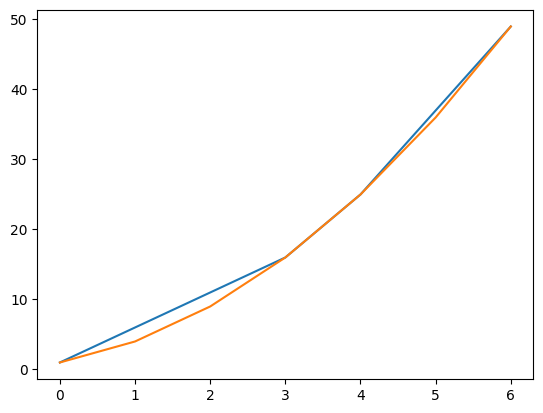

In [ ]:
# 5.1 創建一個有數值缺失的示例
ts = pd.Series([1, np.nan, np.nan, 16, 25, np.nan, 49])
print("原始數值序列:")
print(ts)

# 5.2 線性插值 : 相加除以2
ts_interp = ts.interpolate()
print("\n線性插值後:")
print(ts_interp)
print(ts_interp.plot())

# 5.3 使用其他插值方法
# 二次插值 : 相加開根號 (線較為平滑)
ts_interp_quad = ts.interpolate(method='quadratic')
print("\n二次插值後:")
print(ts_interp_quad)
print(ts_interp_quad.plot())

In [ ]:
# 解說:
# - `interpolate()` 用於使用插值法填充缺失值
# - 默認使用線性插值，假設相鄰點之間有線性關係
# - 也支持其他插值方法，如二次插值 (`quadratic`)
# - 插值法主要適用於數值型數據，特別是時間序列數據
# - 對於有明顯趨勢或規律的數據，插值法通常比簡單填充更合理
# - 插值法需要足夠的非缺失值點作為參考

 
### 📊 6. 實際案例：學生成績數據

In [17]:
# 6.1 創建學生成績數據集
students = pd.DataFrame({
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eva', 'Frank', 'Grace'],
    'Math': [85, 90, np.nan, 75, 60, np.nan, 95],
    'Science': [90, np.nan, 80, 70, np.nan, 85, 100],
    'English': [np.nan, 85, 90, 80, 70, 75, np.nan],
    'History': [80, 75, 85, np.nan, 90, 80, 85]
})

print("學生成績數據 (含缺失值):")
print(students)

學生成績數據 (含缺失值):
      Name  Math  Science  English  History
0    Alice  85.0     90.0      NaN     80.0
1      Bob  90.0      NaN     85.0     75.0
2  Charlie   NaN     80.0     90.0     85.0
3    David  75.0     70.0     80.0      NaN
4      Eva  60.0      NaN     70.0     90.0
5    Frank   NaN     85.0     75.0     80.0
6    Grace  95.0    100.0      NaN     85.0


In [ ]:
# 6.2 檢查缺失值情況
print("每門課程的缺失成績數量:")
print(students.isna().sum())
print("\n每個學生的缺失成績數量:")
print(students.isna().sum(axis=1))

# 6.3 使用平均值填充缺失的成績
students_filled = students.copy()
for column in ['Math', 'Science', 'English', 'History']:
    students_filled[column] = students_filled[column].fillna(students[column].mean())
    
print("\n使用課程平均分填充後的成績:")
print(students_filled)

# 6.4 找出完成所有科目的學生
complete_students = students.dropna()
print("\n完成所有科目的學生:")
print(complete_students)

In [ ]:
# 解說:
# - 在實際應用中，缺失值處理策略取決於數據的性質和分析目的
# - 對於成績數據，使用科目平均分填充是常見的做法
# - 計算每個學生的缺失科目數量可以幫助識別數據完整性問題
# - 根據分析目的，可能需要刪除缺失值過多的記錄
# - 處理缺失值是數據預處理的重要步驟，直接影響分析結果的可靠性

 
### 📋 7. 總結

 
#### 7.1 缺失值處理的主要方法

- **檢測缺失值**:
  - `isna()` / `isnull()`: 檢測缺失值
  - `notna()` / `notnull()`: 檢測非缺失值
  - `.sum()`, `.mean()`: 計算缺失值數量和比例

- **刪除缺失值**:
  - `dropna()`: 刪除含有缺失值的行或列
  - 參數: `how`, `axis`, `thresh`, `subset`

- **填充缺失值**:
  - `fillna()`: 使用指定值或方法填充缺失值
  - 填充策略: 固定值、字典指定值、前向填充、後向填充
  - `interpolate()`: 使用插值法填充數值型缺失值

 
#### 7.2 缺失值處理的注意事項

- 在刪除缺失值前先了解缺失的模式和原因
- 選擇合適的填充方法，避免引入偏差
- 考慮缺失值是否代表有意義的信息
- 處理缺失值前後對比數據統計特性，確保一致性
- 根據缺失值的比例和分布選擇最合適的策略

 
#### 7.3 下一步學習

- 探索更多缺失值处理技巧
- 學習數據類型轉換與處理
- 了解重複值檢測與處理
- 學習數據清洗的完整流程
- 掌握數據預處理的最佳實踐